This is a notebook to recreate Figure 1 of Lamb, Taylor & van Haasteren 2023.  This notebook profiles the a simulated data set as a function of the number of pulsars.

In [78]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format ='retina'

import numpy as np
import matplotlib.pyplot as plt
import glob
from chainconsumer import ChainConsumer
import pickle
from ceffyl import Ceffyl, models
from enterprise.signals import parameter, gp_priors as gpp
from enterprise_extensions.model_utils import get_tspan

# ACCRE-specific import to load correct latex file
## COMMENT OUT AS REQUIRED
import os
os.environ["PATH"] += os.pathsep + '/home/lambwg/latex/bin/x86_64-linux' 

In [79]:
# setup default plotting code
plt.rcParams.update(plt.rcParamsDefault)
with open('/home/lambwg/ng15_rcparams.json', 'rb') as fin:
    plt.rcParams.update(json.load(fin))

# Profiling code

This code was not run in a notebook, but in its own specific script. [Find the script here! - profiler.py
](./scripts/profiler.py)

# Producing the plot

load all the timings!

In [80]:
m2a_avg = np.load('../../../GFL/notebooks/middleton/metadata/m2a_profile.npy')
m3a_avg = np.load('../../../GFL/notebooks/middleton/metadata/m3a_profile.npy')
gl_avg = np.load('../../../GFL/notebooks/middleton/metadata/gl_profile.npy')
gfl_avg = np.load('../../../GFL/notebooks/middleton/metadata/gfl_profile.npy')
fs_avg = np.load('../../../GFL/notebooks/middleton/metadata/fs_profile.npy')

plot the figure!

In [122]:
psrs = np.arange(1, 46)

plt.figure()
plt.plot(psrs, [fs_avg[-1]]*45, label='free spectrum refit', ls='-.')
plt.plot(psrs, gl_avg, label='GFL Lite', ls=':', marker='.')
plt.plot(psrs, gfl_avg, label='GFL', ls=':')
plt.plot(psrs, m2a_avg, label='uncorrelated powerlaw', ls='-', marker='o', ms=0.5)
plt.plot(psrs, m3a_avg, label='HD-correlated powerlaw', ls='-', marker='.')

plt.plot(psrs, 0.00025*psrs,
         c='grey', ls='--', alpha=0.75)
plt.plot(psrs, 1.5e-04*psrs**2,
         c='grey', ls='--', alpha=0.75)

plt.annotate('$y\propto N_\mathrm{p}$', xy=(10, 0.001),
             c='grey', fontsize=18, alpha=0.75)
plt.annotate('$y\propto N_\mathrm{p}^2$', xy=(30, 0.04),
             c='grey', fontsize=18, alpha=0.75)

plt.xlabel('Number of pulsars')
plt.ylabel('likelihood evaluation time (s)')
plt.yscale('log')
plt.grid(visible=False)

import matplotlib.lines as mlines
fs = mlines.Line2D([], [], color='C0', ls='-.', label='free spectrum refit')
gl = mlines.Line2D([], [], color='C1', ls=':', marker='.', label='GFL Lite')
gfl = mlines.Line2D([], [], color='C2', ls=':', label='GFL')
m2a = mlines.Line2D([], [], color='C3', ls='-', marker='o', ms=0.5, label='uncorrelated powerlaw')
m3a = mlines.Line2D([], [], color='C4', ls='-', marker='.', label='HD-correlated powerlaw')
first_legend = plt.legend(handles=[fs, gl, gfl], markerfirst=False, frameon=False,
                          loc=(0.6, 0.25))
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[m2a, m3a], markerfirst=True, frameon=False)

plt.savefig('../plots/profile.pdf',
            dpi=400, bbox_inches='tight', rasterized=True);

/tmp/ipykernel_114587/3621883008.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../plots/profile.pdf',


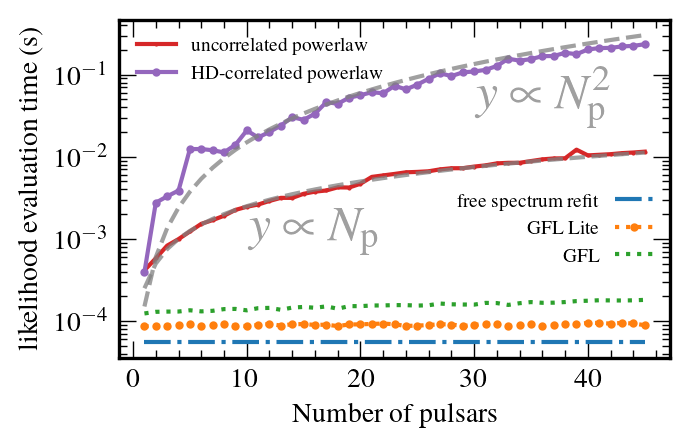

In [123]:
plt.show();